In [1]:
#Basic libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

#Tensorflow libraries for NN
import tensorflow as tf
from tensorflow import keras

#Preprocessing technique
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

## Read and import data

In [2]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/100daysdl/Day 38_AAPL stock price.csv')
print(data.shape)
data.head()

(1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-15,28.982500,29.132500,28.605000,29.070000,26.863998,173364800
1,2015-09-16,29.062500,29.135000,28.860001,29.102501,26.894033,148694000
2,2015-09-17,28.915001,29.122499,28.430000,28.480000,26.318771,256450400
3,2015-09-18,28.052500,28.575001,27.967501,28.362499,26.210186,297141200
4,2015-09-21,28.417500,28.842501,28.415001,28.802500,26.616798,200888000


In [3]:
data.sort_values('Date', inplace=True, ascending=True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-15,28.982500,29.132500,28.605000,29.070000,26.863998,173364800
1,2015-09-16,29.062500,29.135000,28.860001,29.102501,26.894033,148694000
2,2015-09-17,28.915001,29.122499,28.430000,28.480000,26.318771,256450400
3,2015-09-18,28.052500,28.575001,27.967501,28.362499,26.210186,297141200
4,2015-09-21,28.417500,28.842501,28.415001,28.802500,26.616798,200888000


In [4]:
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [6]:
data.isnull().sum().sort_values(ascending=False)

Volume       0
Adj Close    0
Close        0
Low          0
High         0
Open         0
Date         0
dtype: int64

In [7]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-15,28.982500,29.132500,28.605000,29.070000,26.863998,173364800
1,2015-09-16,29.062500,29.135000,28.860001,29.102501,26.894033,148694000
2,2015-09-17,28.915001,29.122499,28.430000,28.480000,26.318771,256450400
3,2015-09-18,28.052500,28.575001,27.967501,28.362499,26.210186,297141200
4,2015-09-21,28.417500,28.842501,28.415001,28.802500,26.616798,200888000


## Explore the data

In [8]:
data = data.set_index('Date')

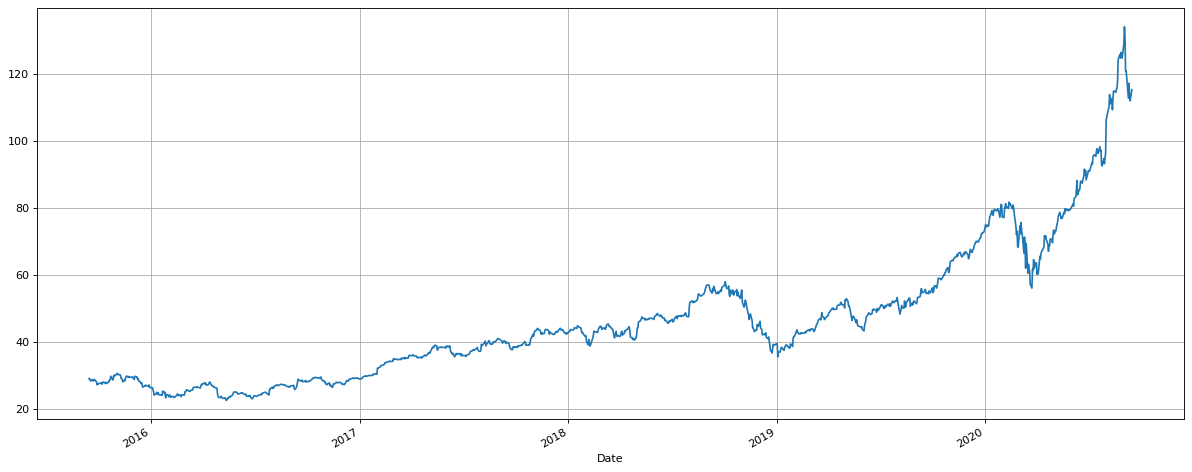

In [9]:
# Visualization of data. Plotting the price close.
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
data['Close'].plot()
plt.tight_layout()
plt.grid()
plt.show()

## Split the data

In [10]:
# Get Close data
df = data[['Close']].copy()

# Split data into train and test
train, test = df.iloc[0:-200], df.iloc[-200:len(df)]

print(len(train), len(test))

1059 200


In [11]:
train[0:5]

,Close
Date,
2015-09-15,29.070000
2015-09-16,29.102501
2015-09-17,28.480000
2015-09-18,28.362499
2015-09-21,28.802500


In [12]:
test[0:5]

,Close
Date,
2019-11-27,66.959999
2019-11-29,66.812500
2019-12-02,66.040001
2019-12-03,64.862503
2019-12-04,65.434998


## Normalize the data

In [13]:
train_max = train.max()
train_min = train.min()

# Normalize the dataframes
train = (train - train_min)/(train_max - train_min)
test = (test - train_min)/(train_max - train_min)

## Build the model

In [14]:
#the model shall see the close prices for the last 10 days (called the time_step) and 
#predict the close price for the next day.

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)


time_steps = 10

X_train, y_train = create_dataset(train, train.Close, time_steps)
X_test, y_test = create_dataset(test, test.Close, time_steps)

In [15]:
print('Training set:', X_train.shape, y_train.shape)
print('Testing set:', X_test.shape, y_test.shape)

Training set: (1049, 10, 1) (1049,)
Testing set: (190, 10, 1) (190,)


In [16]:
def build_model():
  model = keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10, 64)            128       
_________________________________________________________________
dense_1 (Dense)              (None, 10, 64)            4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10, 1)             65        
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
history = model.fit(
  X_train, y_train,
  epochs=100, validation_split = 0.2, batch_size=32, shuffle=False)

Epoch 1/100
27/27 [==============================] - 0s 10ms/step - loss: 0.0026 - mae: 0.0386 - mse: 0.0026 - val_loss: 0.0144 - val_mae: 0.1043 - val_mse: 0.0144
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0020 - mae: 0.0347 - mse: 0.0020 - val_loss: 0.0107 - val_mae: 0.0897 - val_mse: 0.0107
Epoch 3/100
27/27 [==============================] - 0s 2ms/step - loss: 0.0014 - mae: 0.0285 - mse: 0.0014 - val_loss: 0.0092 - val_mae: 0.0834 - val_mse: 0.0092
Epoch 4/100
27/27 [==============================] - 0s 2ms/step - loss: 0.0013 - mae: 0.0263 - mse: 0.0013 - val_loss: 0.0085 - val_mae: 0.0802 - val_mse: 0.0085
Epoch 5/100
27/27 [==============================] - 0s 2ms/step - loss: 0.0012 - mae: 0.0254 - mse: 0.0012 - val_loss: 0.0085 - val_mae: 0.0800 - val_mse: 0.0085
Epoch 6/100
27/27 [==============================] - 0s 2ms/step - loss: 0.0012 - mae: 0.0251 - mse: 0.0012 - val_loss: 0.0082 - val_mae: 0.0788 - val_mse: 0.0082
Epoch 7/100
27/27 [==

In [18]:
print('Training loss:', np.mean(history.history['loss']))
print('MSE:', np.mean(history.history['mse']))

Training loss: 0.0011767162231262774
MSE: 0.0011767162231262774


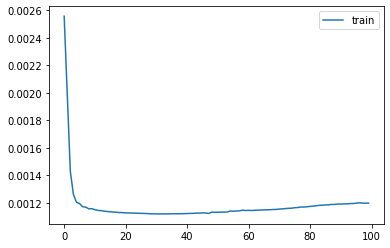

In [19]:
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

## Make predictions

In [20]:
y_pred = model.predict(X_test)

In [21]:
#Rescale
y_test = y_test*(train_max[0] - train_min[0]) + train_min[0]
y_pred = y_pred*(train_max[0] - train_min[0]) + train_min[0]
y_train = y_train*(train_max[0] - train_min[0]) + train_min[0]

In [22]:
y_pred = np.average(y_pred, 1)

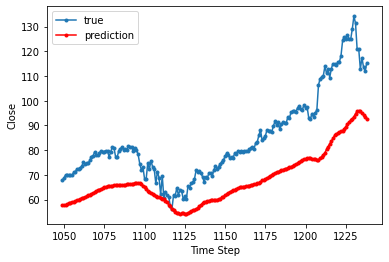

In [23]:
# Plotting the results
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred.flatten(), 'r', marker='.', label="prediction")
plt.ylabel('Close')
plt.xlabel('Time Step')
plt.legend()
plt.show()

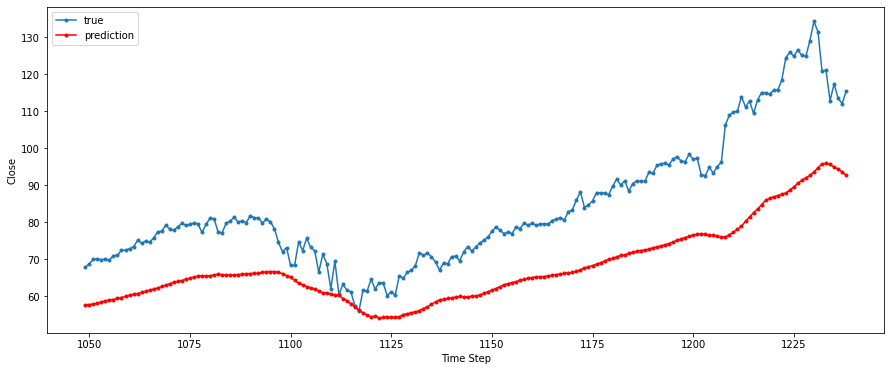

In [24]:
# Plotting the results
plt.figure(figsize=(15,6))
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred.flatten(), 'r', marker='.', label="prediction")
plt.ylabel('Close')
plt.xlabel('Time Step')
plt.legend()
plt.show()

## Build the model with 1 day lag

In [25]:
#the model shall see the close prices for the last 10 days (called the time_step) and 
#predict the close price for the next day.

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)


time_steps = 1

X_train, y_train = create_dataset(train, train.Close, time_steps)
X_test, y_test = create_dataset(test, test.Close, time_steps)

In [26]:
print('Training set:', X_train.shape, y_train.shape)
print('Testing set:', X_test.shape, y_test.shape)

Training set: (1058, 1, 1) (1058,)
Testing set: (199, 1, 1) (199,)


In [27]:
def build_model():
  model = keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1, 64)             128       
_________________________________________________________________
dense_4 (Dense)              (None, 1, 64)             4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1, 1)              65        
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
history = model.fit(
  X_train, y_train,
  epochs=100, validation_split = 0.2, batch_size=32, shuffle=False)

Epoch 1/100
27/27 [==============================] - 0s 8ms/step - loss: 0.0040 - mae: 0.0497 - mse: 0.0040 - val_loss: 0.0076 - val_mae: 0.0715 - val_mse: 0.0076
Epoch 2/100
27/27 [==============================] - 0s 2ms/step - loss: 0.0018 - mae: 0.0326 - mse: 0.0018 - val_loss: 0.0061 - val_mae: 0.0675 - val_mse: 0.0061
Epoch 3/100
27/27 [==============================] - 0s 2ms/step - loss: 6.3808e-04 - mae: 0.0190 - mse: 6.3808e-04 - val_loss: 0.0038 - val_mae: 0.0527 - val_mse: 0.0038
Epoch 4/100
27/27 [==============================] - 0s 2ms/step - loss: 4.4951e-04 - mae: 0.0148 - mse: 4.4951e-04 - val_loss: 0.0030 - val_mae: 0.0467 - val_mse: 0.0030
Epoch 5/100
27/27 [==============================] - 0s 2ms/step - loss: 3.9831e-04 - mae: 0.0126 - mse: 3.9831e-04 - val_loss: 0.0025 - val_mae: 0.0425 - val_mse: 0.0025
Epoch 6/100
27/27 [==============================] - 0s 2ms/step - loss: 3.6871e-04 - mae: 0.0122 - mse: 3.6871e-04 - val_loss: 0.0022 - val_mae: 0.0400 - val_ms

In [29]:
print('Training loss:', np.mean(history.history['loss']))
print('MSE:', np.mean(history.history['mse']))

Training loss: 0.0003721236645651516
MSE: 0.0003721236645651516


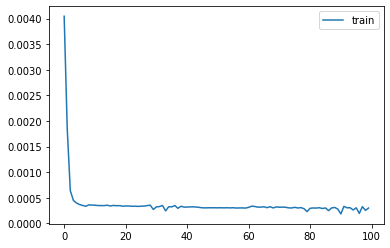

In [30]:
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

## Make predictions

In [31]:
y_pred = model.predict(X_test)

In [32]:
#Rescale
y_test = y_test*(train_max[0] - train_min[0]) + train_min[0]
y_pred = y_pred*(train_max[0] - train_min[0]) + train_min[0]
y_train = y_train*(train_max[0] - train_min[0]) + train_min[0]

In [33]:
y_pred[0]

array([[63.94976]], dtype=float32)

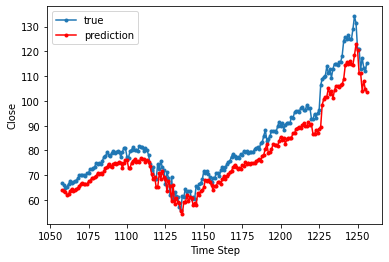

In [34]:
# Plotting the results
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred.flatten(), 'r', marker='.', label="prediction")
plt.ylabel('Close')
plt.xlabel('Time Step')
plt.legend()
plt.show()

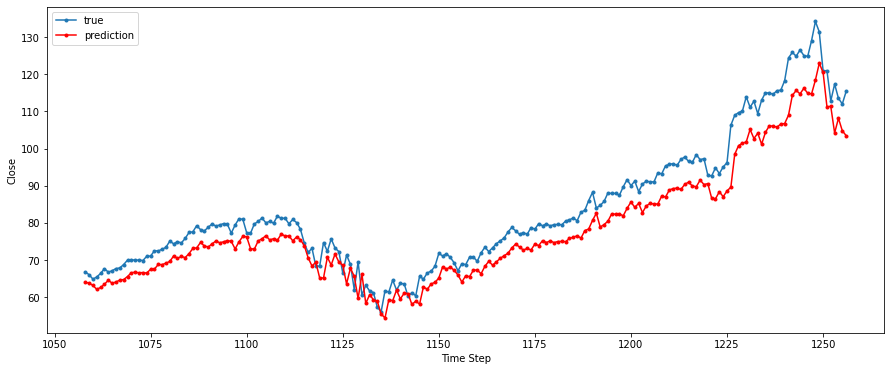

In [35]:
# Plotting the results
plt.figure(figsize=(15,6))
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred.flatten(), 'r', marker='.', label="prediction")
plt.ylabel('Close')
plt.xlabel('Time Step')
plt.legend()
plt.show()